# Ford Go Bike Data Visualization and Analysis
## Nikita Jain

## Preliminary Wrangling

> I chose Ford GoBike System Data as my source data for carrying out thus project. This data set includes information about individual rides made in a bike-sharing system.Multiple data files corresponding to each month of 2018 was downloaded and combined to form a dataset for one whole complete year. The various features included in the dataset are:                                                                             
Trip Duration (seconds)                                                                                                   
Start Time along with date                                                                                                 
End Time along with date                                                                                                   
Start Station ID                                                                                                
Start Station Name                                                                                                         
Start Station Latitude                                                                                                     
Start Station Longitude                                                                                                    End Station ID                                                                                                             
End Station Name                                                                                                           
End Station Latitude                                                                                                       
End Station Longitude                                                                                                     
Bike ID                                                                                                                   
User Type (Subscriber or Customer)                                                                                         
bike_share_for_all_trip

In [1]:
# import all packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime
import math

%matplotlib inline

## Part1 : Merging and loading the dataset

In [2]:
# I saved the csv files from the FordGoBike website in one location on my computer. 
#I then used the glob and os modules to store, load, and combine the files into one new file, ford_bike_data.csv:

path = r'C:\Users\LAPTOP\Desktop\Study Material\Data anaylst nanodegree\Project5\data'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('combined_data.csv', index = False)

In [3]:
# Load dataset 
df= pd.read_csv('combined_data.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


## Part2: Data Assessment

In [4]:
df.shape

(1863721, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


### Part3 :  Quality Issues and cleaning data

#### Quality Issues in the dataset

 >  1) start time and end time are objects change to timestamps                                                           
    2) remove the column bike_share_for_all_trip                                                                           
    3) remove the column start_station_id and end_station_id


#### New columns to be added in the dataset

>   1) get month, day, hour, weekday columns to further analyze the dataset                                               
    2) calculate distance from start and end latitudes and longitudes.                                                  
    3) calculate trip duration in minutes as well.

In [9]:
#create copy of original dataframe
df_clean = df.copy()

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


### Changing the datatype of columns as mentioned above

##### Coding

In [11]:
df_clean.start_time = pd.to_datetime(df_clean.start_time) # changing start time column type to datetime
df_clean.end_time = pd.to_datetime(df_clean.end_time) #changing end time column type to datetime
df_clean.drop('bike_share_for_all_trip',axis=1,inplace=True) #dropping the column
df_clean.drop('start_station_id',axis=1,inplace=True) # dropping the column
df_clean.drop('end_station_id',axis=1,inplace=True) #dropping the column

##### Testing

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 11 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 156.4+ MB


### Adding new columns to the dataset

##### Coding

In [13]:
# extract month number from start_time column
df_clean['month']=df_clean['start_time'].dt.month.astype(int)
# extract weekdays from start_time column
df_clean['weekday']=df_clean['start_time'].dt.strftime('%a')
# extract day from start_time column
df_clean['day']=df_clean['start_time'].dt.day.astype(int)
# extract hour from start_time column
df_clean['hour']=df_clean['start_time'].dt.hour
#adding trip duration in minutes coulmn
df_clean['duration_min']=df_clean['duration_sec']/60
#adding distance column
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2 + (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2)

##### Testing

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
month                      int32
weekday                    object
day                        int32
hour                       int64
duration_min               float64
distance                   float64
dtypes: datetime64[ns](2), float64(6), int32(2), int64(3), object(4)
memory usage: 227.5+ MB


In [15]:
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,weekday,day,hour,duration_min,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,Mission Dolores Park,37.761420,-122.426435,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1,Wed,31,22,1254.733333,0.022599
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,1,Wed,31,16,1423.700000,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,Jackson St at 5th St,37.348759,-121.894798,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1,Wed,31,14,1192.933333,0.028819
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,Market St at Franklin St,37.773793,-122.421239,4th St at Harrison St,37.780955,-122.399749,321,Customer,1,Wed,31,14,1017.933333,0.022652
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,Laguna St at Hayes St,37.776435,-122.426244,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1,Wed,31,19,666.100000,0.026014


In [16]:
df_clean.to_csv('master_ford_bike_data.csv')

### What is the structure of your dataset?

> Originally there were approx. 1863721 bike rides that happen from Jan -Dec 2018. The dataset contained features about:
 a) trip duration: start_time,end_time, how long the trip took in seconds                                                 
 b) stations: start and end station id, name, geolocation (latitude/longitude)                                             
 c) rented bikes: bike id

### New columns were added to dataset to carry out the further analysis

>e) Bike time: month, day, hour of the day, weekday.                                                                       
 f) trip duration in minutes was also added                                                                               
 g) trip distance was also calculated.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested to see at what time bikes are high in demand (during the day/weekday/month). Secondly, whether the service is mostly used by members or casual riders and what is the average trip duration and trip distance is covered and whether both of trip duration and distance is impacted by whether a person is a customer or a subscriber.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect that bike time like hour,day,weekday,month will have the strongest effect on bike demand.
> Also user type will also have a impact on trip duration and also trip distance will have a significant role in deciding the user type

##  Part 4 : Data Visualization and Anaylsis

### Univariate Exploration

#### Distribution of bike rides according to month,day and hour

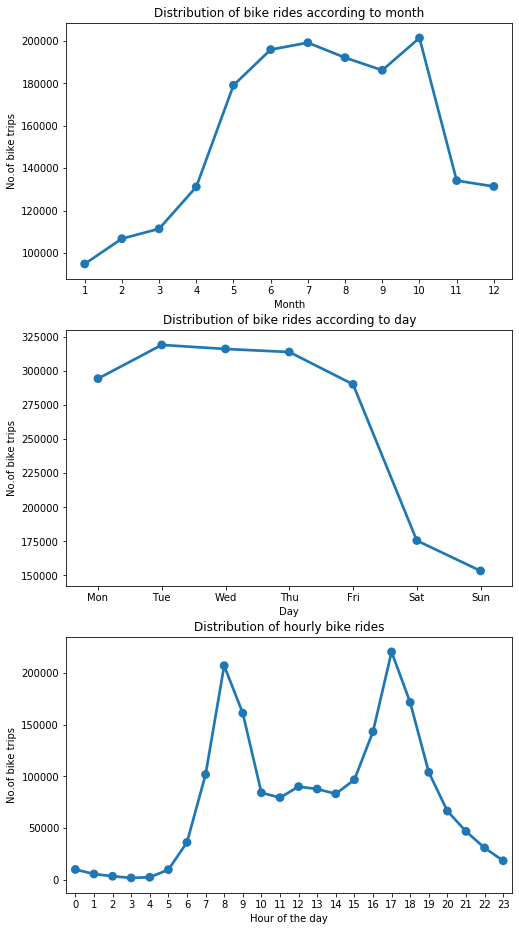

In [17]:
plt.figure(figsize=[8, 16])

plt.subplot(3,1,1)
count2=df_clean.groupby('month').size()
sb.pointplot(data = df_clean,x = count2.index,y=count2,color=sb.color_palette()[0]);
plt.title("Distribution of bike rides according to month");
plt.ylabel("No.of bike trips");
plt.xlabel("Month");

#according to day
plt.subplot(3,1,2)
count1=df_clean.groupby('weekday').size()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(data=df_clean, x=count1.index, y=count1 ,color = sb.color_palette()[0], order = weekday);
plt.title("Distribution of bike rides according to day");
plt.ylabel("No.of bike trips");
plt.xlabel("Day");

#according to hour
count=df_clean.groupby('hour').size()
plt.subplot(3,1,3)
sb.pointplot(data = df_clean,x =count.index ,y=count, color=sb.color_palette()[0]);
plt.title("Distribution of hourly bike rides");
plt.ylabel("No.of bike trips");
plt.xlabel("Hour of the day");

> It looks like Bike sharing is used mostly used on weekdays as compared to weekends.In weekdays bike may be used to carry out daily activites such as to commute to office,schools or colleges and on weekends may be used for fun activites.We can see a significant decrease in number of bike rides as winter season approaches while bike rides were at peak in October, followed by July month. The number of bike trip are at peak in office hours that is at 9 am and 5pm taking peaks at both these times.

#### Average duration of trips

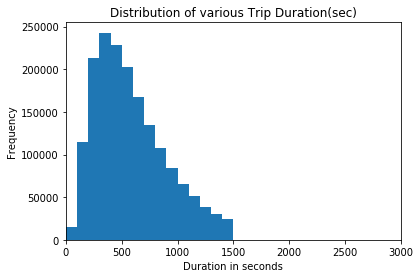

In [33]:
# Here we plot the distribution of trip durations.
binedges = np.arange(0, df_clean['duration_min'].max() + 100 , 100)
plt.hist(data = df_clean , x = 'duration_sec' , bins = binedges)
plt.xlim(0,3000);
plt.title('Distribution of various Trip Duration(sec)');
plt.xlabel('Duration in seconds');
plt.ylabel('Frequency');

>We can visualize from above that the plot is right-screwed having a  long tail its right. The next step is to apply a logarithmic transformation to x-axis so that plot is easily interpretable and results can be drawn to interpret.Visualizing the above plotted plot was extremely difficult so the bin-width was increased to 100 so as to visualize the plot and logarithmic transformation was applied to column trip duration in minutes.

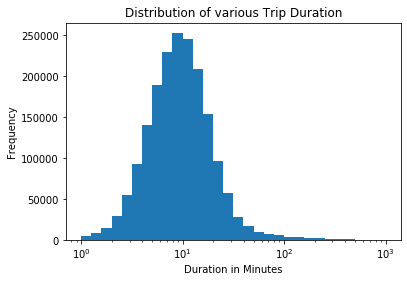

In [19]:
# plotting the log values of trip duration
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
plt.hist(data = df_clean , x = 'duration_min' , bins = binedges);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

>As it can be interpreted from the above plot, a majority of people use towards use bikes for short duration trips mostly for 10 minutes and trip duration ranges from mostly 1 minute to 100 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Bikes are high in demand between April to October months due to summer season and they drop during winter season. Most of the people take rides during Weekdays from Monday to Friday may be commute purposes compare to weekends. 8-9 am and 5-6pm are busy hours for daily bike riders.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the duration of bike trips in minutes the logarithmic values of duration are plotted to give better perception. 

###  Bivariate Exploration

#### Bikes Ride Proportion by User Type

Customer proportion: 0.1503266851637128
Subscriber proportion: 0.8496733148362872


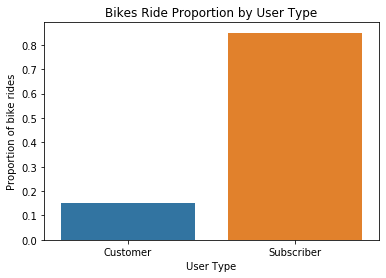

In [20]:
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()


customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()


labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
print("Customer proportion: "+str(customer_prop))
print("Subscriber proportion: "+str(subscriber_prop))

sb.barplot(data=df_clean,x=labels,y=sizes);
plt.ylabel("Proportion of bike rides");
plt.xlabel("User Type");
plt.title("Bikes Ride Proportion by User Type");


>85% of Subscribers are using bike service compare to customers using bike service with 15%. This tell us that Subscribers often use it for daily commute and customers use it for more lesiure activities.

#### Average trip duration per user type

user_type
Customer      1922.779528
Subscriber     668.795275
Name: duration_sec, dtype: float64


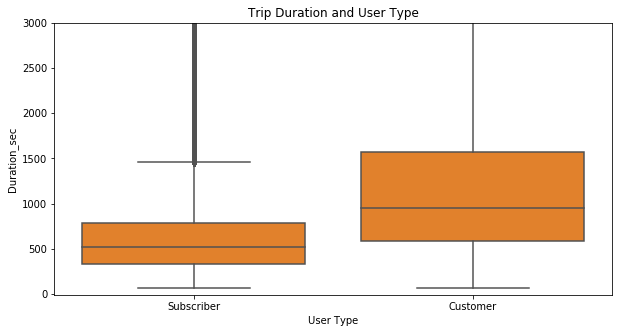

In [21]:
print(df_clean.groupby('user_type')['duration_sec'].mean())
plt.figure(figsize = [10, 5]);
base_color = sb.color_palette()[1]
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_sec', color = base_color);
plt.title('Trip Duration and User Type');
plt.ylim([-10, 3000]);
plt.xlabel('User Type');
plt.ylabel('Duration_sec');
plt.show();

>Fom above drawn boxplot, it shows that Customers had longer trip duration around 1922 sec which is approximately 32 minutes when compare to Subscribers who took average trip duration of about 669 secs which is around 12 mins.

#### Month Wise Trip Duration Trend

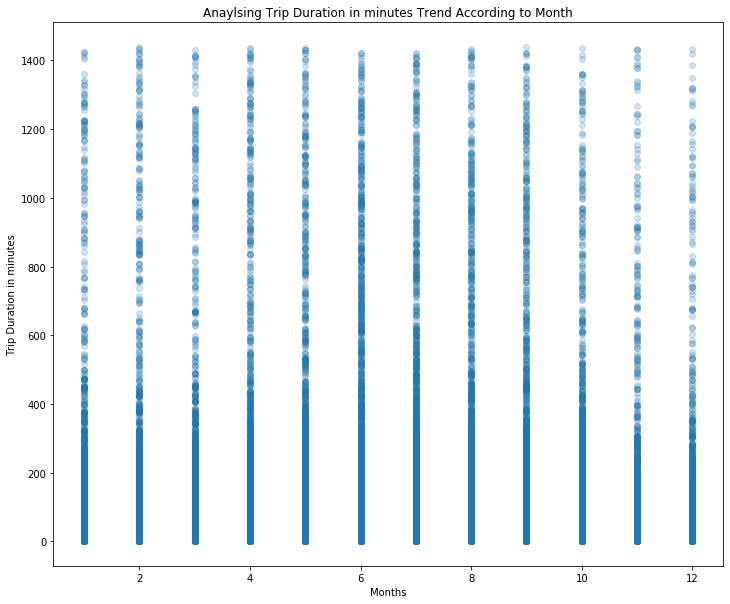

In [29]:
plt.figure(figsize = [12,10])
plt.scatter(data = df_clean , x = 'month' , y = 'duration_min' , alpha = 0.2);
plt.title('Anaylsing Trip Duration in minutes Trend According to Month');
plt.xlabel('Months');
plt.ylabel('Trip Duration in minutes');

> As we can observe, the period from 'June to August' in '2018' has recorded the trips with most trip duration, whereas in the case of remaining seasons, we do not observe a significant difference.

#### Distance travelled according to user-type

user_type
Customer      0.016721
Subscriber    0.015745
Name: distance, dtype: float64


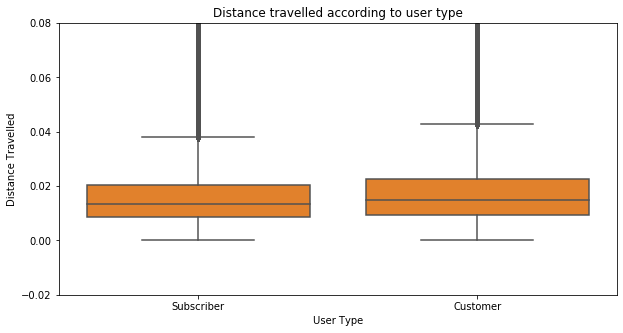

In [23]:
plt.figure(figsize = [10, 5]);
sb.boxplot(data=df_clean, x='user_type', y='distance', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Distance Travelled');
plt.ylim(-0.02,0.08);
print(df_clean.groupby('user_type')['distance'].mean());
plt.title("Distance travelled according to user type");


> The trend of distance travelled for customers is slighlty greater than the trend of distance covered by subscribers.
Customers on average travel a distance of about 0.016 whereas on other hand subscribers on average travel a distance of 0.015

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can observe interesting differences in patterns between Customers and Subscribers.As mentioned in above Bi-variate Exploration Analysis, Customers tend to more often use the service between 10 am -7pm and take more rides during weekends. Subscribers actually uses the service from Monday -Friday between 8 am-9am and 5pm-6pm and customers tend to have a larger average distance travelled as compared to subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We can observe a significant difference in the trip duration between customers and subscribers. Unlike Subscribers, Customers took longer trip duration around 32 minutes here as subscribers took shorter distance trips around 10-11 mins. Also we can observe that,the months of June-August recorded the most trip duration, whereas in the case of remaining seasons, a significant difference is not observed.

## Multivariate Exploration

#### Average duration of trip rides each month according to user type

month  user_type 
1      Customer      38.665315
       Subscriber    10.900375
2      Customer      37.141483
       Subscriber    11.004690
3      Customer      37.247777
       Subscriber    10.611054
4      Customer      36.219532
       Subscriber    10.634158
5      Customer      30.610755
       Subscriber    11.056522
6      Customer      32.448221
       Subscriber    11.637076
7      Customer      32.487683
       Subscriber    11.558934
8      Customer      31.622806
       Subscriber    11.262796
9      Customer      30.276094
       Subscriber    11.660484
10     Customer      28.850660
       Subscriber    11.108635
11     Customer      27.212868
       Subscriber    10.759785
12     Customer      26.596348
       Subscriber    10.793350
Name: duration_min, dtype: float64


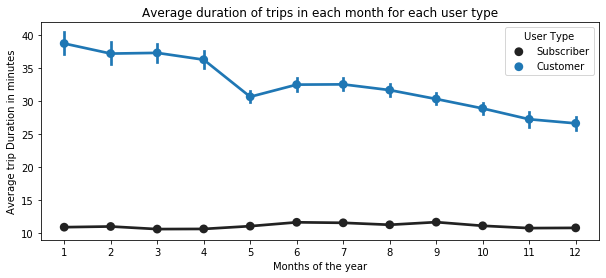

In [24]:
plt.figure(figsize=[10, 4]);

# plot the point plot of month vs user type
sb.pointplot(data=df_clean, x='month', y='duration_min', hue='user_type',color = sb.color_palette()[0]);
plt.xlabel('Months of the year');
plt.ylabel('Average trip Duration in minutes');
plt.legend(title='User Type');
plt.title("Average duration of trips in each month for each user type");
print(df_clean.groupby(['month','user_type'])['duration_min'].mean())


>The time series plot shows that for different user types, the trend of trip duration among subscriber almost remain stable whereas the trend of trip duration among customer keeps on decreasing as the future month advances leading to decrease in average trip durations after July. 

#### Average duration of trip rides each day according to user type

weekday  user_type 
Fri      Customer      30.389245
         Subscriber    10.988112
Mon      Customer      30.206968
         Subscriber    10.821355
Sat      Customer      36.853594
         Subscriber    12.723747
Sun      Customer      37.897797
         Subscriber    12.758521
Thu      Customer      28.299029
         Subscriber    10.907142
Tue      Customer      29.029184
         Subscriber    10.774447
Wed      Customer      27.985471
         Subscriber    10.892428
Name: duration_min, dtype: float64


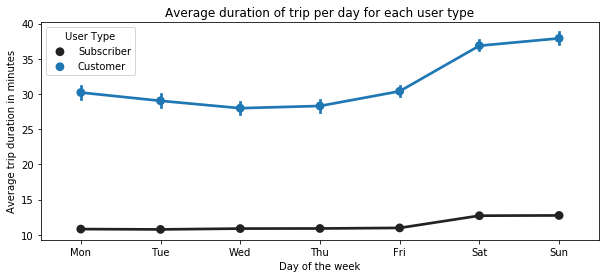

In [25]:
plt.figure(figsize=[10, 4]);
# plot the point plot of month vs user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(data=df_clean, x='weekday', y='duration_min' ,color = sb.color_palette()[0], hue='user_type',order = weekday);
plt.ylabel("Average trip duration in minutes");
plt.xlabel("Day of the week");
plt.legend(title='User Type');
plt.title("Average duration of trip per day for each user type");
print(df_clean.groupby(['weekday','user_type'])['duration_min'].mean())

>The average trip duration of subscribers tend to remain stable throughout the weekdays and tend to rise during the weekends.On the other hand trip duration of customers tend to decrease during the weekdays and we can see a significant rise on the trip duration during the weekends.

#### Average duration of trip rides each hour of the day according to user type

hour  user_type 
0     Customer       46.986811
      Subscriber     12.377003
1     Customer       49.068544
      Subscriber     14.808418
2     Customer       67.053753
      Subscriber     14.082784
3     Customer      103.352089
      Subscriber     18.282043
4     Customer       69.003956
      Subscriber     13.460685
5     Customer       31.175135
      Subscriber      9.738801
6     Customer       24.334446
      Subscriber      9.604822
7     Customer       20.768238
      Subscriber     10.300176
8     Customer       21.379638
      Subscriber     10.794210
9     Customer       27.516938
      Subscriber     10.513735
10    Customer       36.778758
      Subscriber     10.904591
11    Customer       38.179497
      Subscriber     11.483501
12    Customer       37.281920
      Subscriber     11.533808
13    Customer       37.834386
      Subscriber     11.485430
14    Customer       36.672954
      Subscriber     11.937603
15    Customer       34.000912
      Subscriber     1

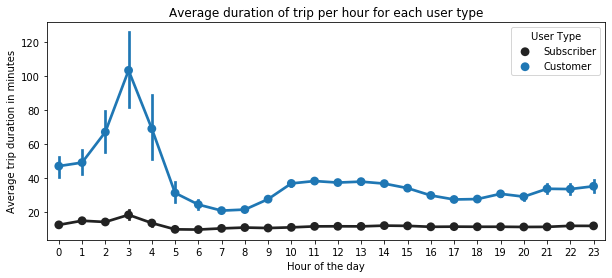

In [26]:
plt.figure(figsize=[10, 4])
# plot the point plot of month vs user type
sb.pointplot(data=df_clean, x='hour', y='duration_min' ,color = sb.color_palette()[0], hue='user_type');
plt.ylabel("Average trip duration in minutes");
plt.xlabel("Hour of the day");
plt.legend(title='User Type');
plt.title("Average duration of trip per hour for each user type");
print(df_clean.groupby(['hour','user_type'])['duration_min'].mean())

> As we can see from above plot trip duration of customer tend to follow no particular pattern whereas trip duration of subscribers tend to follow a stable pattern with a slight increase in trip duration.

####  Trip Distance Against Month and User Type

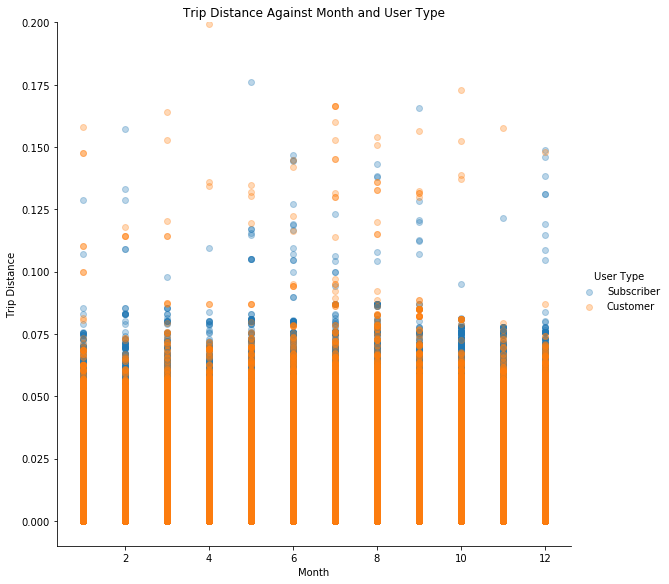

In [27]:
g = sb.FacetGrid(data =  df_clean, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month','distance', alpha = 0.3)
g.add_legend(title="User Type");
plt.title('Trip Distance Against Month and User Type');
plt.xlabel('Month');
plt.ylabel('Trip Distance');
plt.ylim(-0.01,0.2);


>From the above plots, we can conclude that the count of Customers is much more than the Subscribers and
One interesting insight that can be obtained here is that most of the Subscribers have a tendency to rent out the bikes for distances, mostly spanning over 0.06 whereas customers tend to cover longer trip in terms of distance.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part  of exploration we observed that average duration of trips almost remain stable for subscribers whereas increases for customers particularly during weekdays.We can also observe that customers tend to cover longer trip distance as compared to suscribers and other hand trip distance of subscribers mostly spans over 0.06. Also all the monthly , daywise and hourly trends of trip duration of subscribers tend to remain more stable  as compared to trends of customers.

### Were there any interesting or surprising interactions between features?
> The average duration of customer decreases rapidly as we apporach winter seasns whereas the average trip duration of the   subscribers increases rapidly and remain stable throughout the course of the year.
> The future market can be considered to target more customers and try to convert them to subscribers which can further lead to more profit.

### Conclusion:
>For carrying out the Data Analysis,  data from January to December of year 2018 was considered.Around 18,63721 bike rides were recorded in the year 2018. 

>The demand for bike rentals was high between the months April to October months due to summer season and a significant  drop was seen te during winter season. Subscribers use the service during Weekdays from Monday to Friday to carry out daily day to day activities whereas customers tend to use it more on weekends to go in trips or to have fun.

>85% of Subscribers are using bike service compare to customers using bike service with 15%.People use this service on weekdays more than weekends. Subscribers' average trip duration is around 11 minutes. Customers' average trip duration is around 32 minutes. Customers tend to go on a longer trip distance as compared to subscribers and on the contrary trip distance for subscribers mostly ranges from over 0.06. Trip duration of suscribers tend to remain stable and follow a particular trend whereas no significant trend can be observed in patterns of trip duration of customers.

### References

https://github.com/nbalotaibi/Communicate-Data-Findings

https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

https://github.com/saiogirala/Ford_Bike_Communicating_Findings/blob/master/Exploratory_Data_Analysis.ipynb

https://stackoverflow.com/questions/46819947/seaborn-right-ytick

https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/

https://www.lyft.com/bikes/bay-wheels/system-data